This notebook reproduces the ISIMIP wheat trade network figure from [Hedlung et al. (2022)](https://iopscience.iop.org/article/10.1088/1748-9326/aca68b). There are slight changes to the figure from Hedlund et al., as the Louvain algorithm used to detect the communities is not deterministic. 

In [1]:
from src.model import PyTradeShifts
import os
import pandas as pd

In [2]:
print(os.getcwd())
# Go up one directory to get to the data folder
data_dir = os.path.join(os.path.dirname(os.getcwd()))
os.chdir(data_dir)
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts/scripts
/home/florian/Documents/GitHub/pytradeshifts


In [3]:
ISIMIP = pd.read_csv("." + "/data/scenario_files/ISIMIP_climate/ISIMIP_wheat_Hedlung.csv", index_col=0)
nan_indices = ISIMIP.index[ISIMIP.iloc[:, 0].isnull()].tolist()

Loaded data for Wheat in Y2018.
Removed 0 countries with no trade or production.
Prebalanced trade matrix.
Corrected re-exports.


Removed 133 countries from the trade matrix.
Removed countries with trade below the 75th percentile.
Applied scenario ISIMIP.
Built trade graph.
Found 5 trade communities.


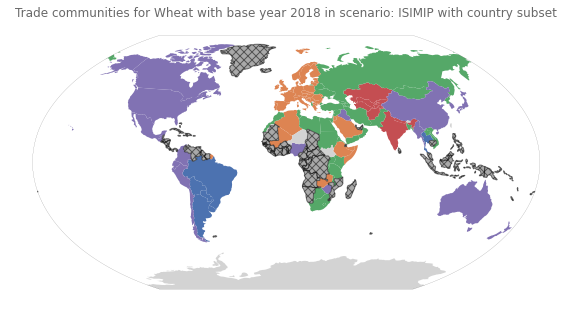

In [4]:
ISIMIP = PyTradeShifts(
    crop="Wheat",
    base_year=2018,
    scenario_file_name="ISIMIP_climate/ISIMIP_wheat_Hedlung.csv",
    scenario_name="ISIMIP",
    countries_to_remove=nan_indices,
)
